# Required packages

In [32]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data

In [33]:
# Input data
data = {"full":"transcripts_full_wp1.gtf", "multi":"transcripts_multi_wp1.gtf", "full-norm1": "transcripts_full_norm1.gtf"}
df_dict = {}
for id, file in data.items():
    df = pd.DataFrame()
    df = pd.read_csv(file, sep="\t", names=["seqname","source","feature","start","end","score","strand","frame","attribute"])
    df_dict[id] = df

# Number of transcripts

In [34]:
# Extract Transcript Data
transcripts_dict = {}
for id, frame in df_dict.items():
    df_transcripts = frame[frame["feature"] == "transcript"]
    print(id + ": " + str(df_transcripts.shape[0]))
    transcripts_dict[id] = df_transcripts

full: 97597
multi: 82831
full-norm1: 40252


# Number of transcripts per gene

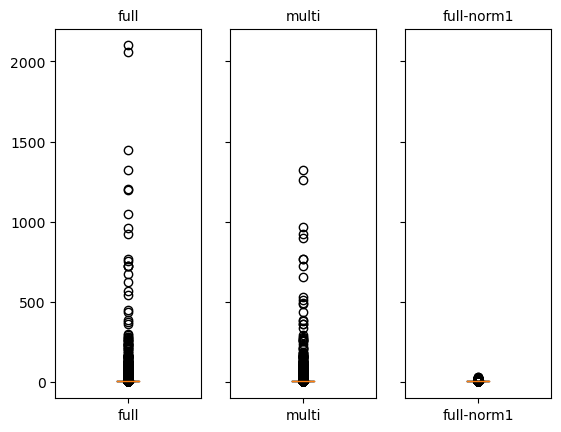

In [35]:
# Transcripts per gene
fig, axs = plt.subplots(1, len(df_dict), sharey=True)
count = 0
for id, frame in transcripts_dict.items():
    no_trans_per_gene = []
    gene = 0
    transcripts = 0
    for index, line in frame.iterrows():
        current_gene = line["attribute"].split(";")[0][13:-1]
        if current_gene == str(gene):
            transcripts += 1
        else:
            gene = current_gene
            no_trans_per_gene.append(transcripts)
            transcripts = 1
    no_trans_per_gene.append(transcripts)
    no_genes = len(no_trans_per_gene)
    df_vis = pd.DataFrame.from_dict({"Gene": list(range(no_genes)), "Number of transcripts": no_trans_per_gene})
    #sns.violinplot(ax=axs[count], x=df_vis["Number of transcripts"])
    #sns.violinplot(ax=axs[count], x=df_vis[df_vis["Number of transcripts"] < 50][df_vis["Number of transcripts"] > 2]["Number of transcripts"])
    axs[count].set_title(id, fontsize=10)
    #sns.boxplot(ax=axs[count], x=df_vis["Number of transcripts"])
    axs[count].boxplot(x=df_vis["Number of transcripts"], labels=[id])
    #axs[count].set_yscale('log')
    count += 1


# Number of Exons

In [36]:
# Extract Transcript Data
exons_dict = {}
for id, frame in df_dict.items():
    df_exons = frame[frame["feature"] == "exon"]
    print(id + ": " + str(df_exons.shape[0]))
    exons_dict[id] = df_exons

full: 1190187
multi: 999188
full-norm1: 353522


# Number of exons per transcript

In [37]:
# Save the number of exons per transcript in a dataframe for each file
exons_dict2 = {}
for id, frame in exons_dict.items():
    no_exons_per_transcript = []
    transcript = 0
    exons = 0
    gene = 0
    for index, line in frame.iterrows():
        current_transcript = line["attribute"].split(";")[1][25:-1]
        current_gene = line["attribute"].split(";")[0][13:-1]
        if current_transcript == str(transcript) and current_gene == str(gene):
            exons += 1
        else:
            transcript = current_transcript
            gene = current_gene
            no_exons_per_transcript.append(exons)
            exons = 1
    no_exons_per_transcript.append(exons)
    no_transcripts = len(no_exons_per_transcript)
    print(id + ": " + str(no_transcripts))
    df_vis2 = pd.DataFrame.from_dict({"Transcript": list(range(no_transcripts)), "Number of exons": no_exons_per_transcript})
    exons_dict2[id] = df_vis2

full: 97598
multi: 82832
full-norm1: 40253


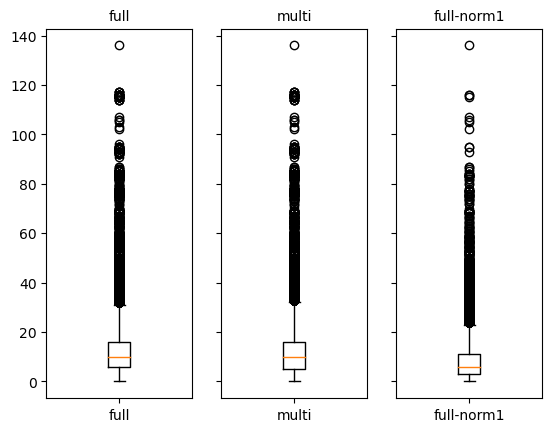

In [39]:
# Visualisation
fig, axs = plt.subplots(1, len(df_dict), sharey=True)
count = 0
for id, frame in exons_dict2.items():
    #sns.violinplot(ax=axs[count], x=df_vis["Number of exons"])
    #sns.violinplot(ax=axs[count], x=df_vis[df_vis["Number of exons"] < 50][df_vis["Number of exons"] > 2]["Number of exons"])
    axs[count].set_title(id, fontsize=10)
    #sns.boxplot(ax=axs[count], x=df_vis["Number of exons"])
    axs[count].boxplot(x=frame["Number of exons"], labels=[id])
    count += 1